In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [113]:
df=pd.read_csv('heartdisease_data.csv')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [114]:
df.columns =['age','sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang','oldpeak', 'slope', 'ca', 'thal', 'target'] 

In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [116]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0
199,62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [118]:
uniqueValues = df.nunique()
print(uniqueValues)

age          39
sex           2
cp            4
trestbps     41
chol        100
fbs           3
restecg       3
thalach      60
exang         3
oldpeak      15
slope         4
ca            2
thal          4
target        5
dtype: int64


In [119]:
df=df.replace({'?': None})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,None,None,2
1,44,1,4,130,209,0,1,127,0,0,None,None,None,0
2,60,1,4,132,218,0,1,140,1,1.5,3,None,None,2
3,55,1,4,142,228,0,1,149,1,2.5,1,None,None,1
4,66,1,3,110,213,1,2,99,1,1.3,2,None,None,0


In [120]:
df.isnull().sum(axis = 0)

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
target        0
dtype: int64

In [121]:
#we are removing columns 'exang',slope','ca' and 'thal' because of many missing values.
df=df.drop(['exang','slope','ca','thal'], axis=1)
df.head()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,target
195,54,0,4,127,333,1,1,154,0,1
196,62,1,1,None,139,0,1,None,None,0
197,55,1,4,122,223,1,1,100,0,2
198,58,1,4,None,385,1,2,None,None,0
199,62,1,2,120,254,0,2,93,0,1


In [122]:
for column in df.columns:
    df['trestbps'].fillna(df.trestbps.mode()[0], inplace=True)
    df['thalach'].fillna(df.thalach.mode()[0], inplace=True)
    df['oldpeak'].fillna(df.oldpeak.mode()[0], inplace=True)
    df['chol'].fillna(df.chol.mode()[0], inplace=True)
    df['fbs'].fillna(df.fbs.mode()[0], inplace=True)

In [123]:
df.isnull().sum(axis = 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
oldpeak     0
target      0
dtype: int64

In [124]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,target
195,54,0,4,127,333,1,1,154,0,1
196,62,1,1,120,139,0,1,120,0,0
197,55,1,4,122,223,1,1,100,0,2
198,58,1,4,120,385,1,2,120,0,0
199,62,1,2,120,254,0,2,93,0,1


In [125]:
df.describe()

,age,sex,cp,restecg,target
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


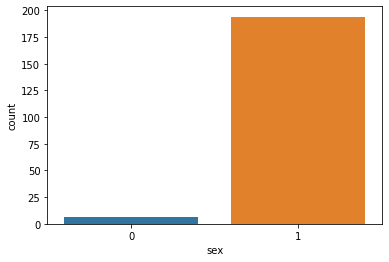

In [126]:
sns.countplot(df['sex'])

Text(0.5, 1.0, 'Density plot')

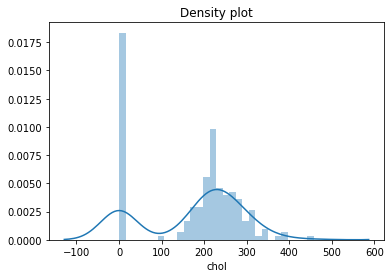

In [127]:
sns.distplot(df['chol'], kde = True, hist = True, bins= 30)
plt.title("Density plot")

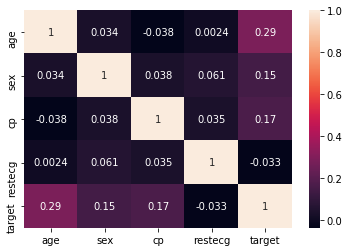

In [128]:
sns.heatmap(df.corr(), annot=True)

In [129]:
X = df.drop(['target'], axis=1).values
y = df['target'].values

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [131]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 1.14 		 1.30 		0.93 		0.21


In [133]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

21.34075856778529 %


In [ ]:
df=pd.DataFrame(y_pred_lr)
df.to_csv('Heart Disease model .csv')